## Telecom churn case study
##### Business problem:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15 to 25% annual churn rate. Given the fact that it costs 5 to 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So, we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [1]:
# import libraries
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# Traking time to check how long the model took to build
start_time = timer(None)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

#set the rows and columns to display max
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## SECTION A: Data Preperation

- Read data
- Check nulls
- Impute values
- Drop cols and rows having too many nulls
- Correct Datatype conversion
- Identify meaning of Zero as necessary data points or null data point

In [2]:
# read data
churn = pd.read_csv("telecom_churn_data.csv", sep=',')

In [3]:
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [4]:
#check for rows and columns
churn.shape

(99999, 226)

#### High-value customers
- Good Phase

In [5]:
#calculating total data recharge 
churn['total_data_rech_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_data_rech_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']

#add total data and total recharge to get total recharge of a month
churn['amt_data_6'] = churn[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
churn['amt_data_7'] = churn[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

churn['AVG_amt_data_6_7'] = churn[['amt_data_6','amt_data_7']].mean(axis=1)

In [6]:
#checking for the percentile for 6 , 7 and avg of 6_7 months
churn[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(start=0.1, stop=0.9,num=9))

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.1,0.0,0.0,60.0
0.2,80.0,65.0,108.5
0.3,120.0,110.0,155.0
0.4,170.0,160.0,209.5
0.5,230.0,220.0,275.0
0.6,290.0,283.0,360.0
0.7,378.0,370.0,478.0
0.8,504.0,500.0,656.5
0.9,732.0,731.0,1028.0


In [7]:
#df=churn[(churn['AVG_amt_data_6_7']>=churn['AVG_amt_data_6_7'].quantile(0.7))]

In [8]:
df=churn[(churn['AVG_amt_data_6_7']> churn['AVG_amt_data_6_7'].quantile(0.7))]

- As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile.

- if we use greater than or equal to, we end up getting a little above 30K i.e 30001 records as against to 29.9K records.
- So, if we conisder only greater than, then we get 29.9K rows.
- Therefore, consider greater than to filter high value customers

In [9]:
#Checking for entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


### Tagging Churn Customers 

In [10]:
#taking values related to 9th months as per given business objective
df['churn'] = np.where(
                            ((df['total_ic_mou_9'] == 0.00) | (df['total_og_mou_9'] == 0.00))
                            & ((df['vol_2g_mb_9'] == 0.00) | (df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

In [11]:
#check for total value counts of churn 
df['churn'].value_counts()

0    26698
1     3255
Name: churn, dtype: int64

In [12]:
#check for churn rate
(df['churn'].value_counts()/df.shape[0]).round(2)

0    0.89
1    0.11
Name: churn, dtype: float64

In [13]:
#drop features related to churn phase i.e 9th months.
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [14]:
#check for the missing values - how many are there and also their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'Features', 0: 'Missing'}).sort_values('Missing',ascending = False)
missing_values

,Features,Missing
145,arpu_3g_8,46.80
151,night_pck_user_8,46.80
121,date_of_last_rech_data_8,46.80
127,max_rech_data_8,46.80
130,count_rech_2g_8,46.80
133,count_rech_3g_8,46.80
136,av_rech_amt_data_8,46.80
124,total_rech_data_8,46.80
166,fb_user_8,46.80
148,arpu_2g_8,46.80


In [15]:
#checking for single or unique values: They wont be significant and so drop them
unique_val = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_val[unique_val['nunique'] == 1]
print('\n No.of features:', len(unique_val[unique_val['nunique'] == 1]))
#print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))

,feature,nunique
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1



 No.of features: 13


In [16]:
#drop the unique value columns.
df = df.drop(columns = list(unique_val[unique_val['nunique'] == 1]['feature']))

#### Missing value imputation

In [17]:
#take the highest missing value
df['arpu_3g_8'].isna().sum()

14018

In [18]:
#Relate this highest missing value with other 8th months
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [19]:
#Now replace the value with 0
df['arpu_3g_8'].fillna(0, inplace=True)

#### Convert datetime columns

In [20]:
# convert datetime
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])

In [21]:
# seperating the date columns
date_var = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8", 
            "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"]
df[date_var].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


In [22]:
#check for null dates
for col in date_var:
#     print(col, '::' , df[col].unique().tolist())
    print(col, '::' , df[col].isna().sum())
    print("\n")

date_of_last_rech_6 :: 73


date_of_last_rech_7 :: 98


date_of_last_rech_8 :: 582


date_of_last_rech_data_6 :: 13213


date_of_last_rech_data_7 :: 12915


date_of_last_rech_data_8 :: 14018




### Derived Feature
##### Taking out days from last month and date of last recharge

In [23]:
#A timedelta object represents a duration, the difference between two dates or times.

#Create new days columns from datetime

last_date_of_month_6 = datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.strptime("31-08-2014", "%d-%m-%Y")

df["rech_days_left_6"] = (last_date_of_month_6 - df.date_of_last_rech_6).astype('timedelta64[D]')
df["rech_days_left_7"] = (last_date_of_month_7 - df.date_of_last_rech_7).astype('timedelta64[D]')
df["rech_days_left_8"] = (last_date_of_month_8 - df.date_of_last_rech_8).astype('timedelta64[D]')

day_col = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
df[day_col].head(5)

,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,9.00,15.00,23.00
7,3.00,6.00,5.00
8,5.00,0.00,1.00
21,0.00,0.00,0.00
23,12.00,24.00,7.00


In [24]:
#Drop all date columns
df.drop(date_var, axis=1,inplace=True)
len(date_var)
df.shape

6

(29953, 161)

#### Checking the correlation

In [25]:
corr = df.corr()
df_corr = corr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.4)) | ((df_corr[0] <= -0.4) & (df_corr[0] > -1))]

,level_0,level_1,0
22329,sachet_2g_8,count_rech_2g_8,0.99
18009,count_rech_2g_8,sachet_2g_8,0.99
22167,sachet_2g_7,count_rech_2g_7,0.99
17847,count_rech_2g_7,sachet_2g_7,0.99
17685,count_rech_2g_6,sachet_2g_6,0.98
...,...,...,...
17817,count_rech_2g_7,max_rech_data_7,-0.44
17816,count_rech_2g_7,max_rech_data_6,-0.45
17176,max_rech_data_6,count_rech_2g_7,-0.45
17364,max_rech_data_7,sachet_2g_7,-0.45


In [26]:
df.shape

(29953, 161)

In [27]:
# dropping highly correlated features more than 80% using upper triangular matrix.
corr_matrix = df.corr().abs()
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop_col = [col for col in high_corr.columns if any(high_corr[col] > 0.80)]

In [28]:
#drop the higher correlation.
df.drop(columns=drop_col, axis=1,inplace=True)

In [29]:
df.shape

(29953, 107)

In [30]:
# dropping categorical columns
df.drop(columns = list(df.select_dtypes(include=['category']).columns), axis =1, inplace = True)

In [31]:
## dropping object specific columns
df.drop(columns = list(df.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [32]:
## replacing all the missing values with 0's
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.fillna(0,inplace=True)

In [33]:
#checking the null values after replacement with 0's
df.isnull().sum()

mobile_number         0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8          0
isd_og_mou_6          0
spl_og_mou_6          0
spl_og_mou_7          0
spl_og_mou_8          0
og_others_6           0
og_others_7           0
og_others_8           0
loc_ic_t2t_mou_6      0
loc_ic_t2m_mou_6      0
loc_ic_t2m_mou_7      0
loc_ic_t2f_mou_6      0
loc_ic_t2f_mou_7

In [34]:
#check the final shape of dataframe
df.shape

(29953, 107)

# Section B: Data Analysis

- Check Churn distribution.
- Revenue related columns and their relationship with churn and each other.
- Check Recharge related columns and their relationships with churn and each other.
- Check *Data* Recharge related columns and their relationships with churn and each other.


<Figure size 576x288 with 0 Axes>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Churn count')

Text(0.5, 1.0, 'Churn count Distribution')

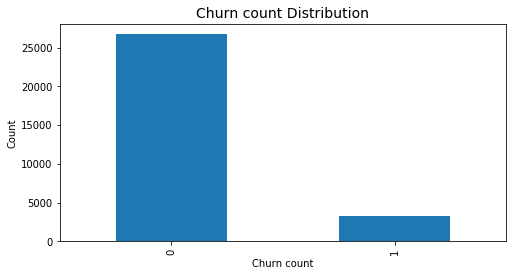

In [35]:
#check for churn counts
plt.figure(figsize=(8,4))
df['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn count')
plt.title('Churn count Distribution',fontsize=14)
plt.show()


In [36]:
#Analysis using pairplots and scatterplots

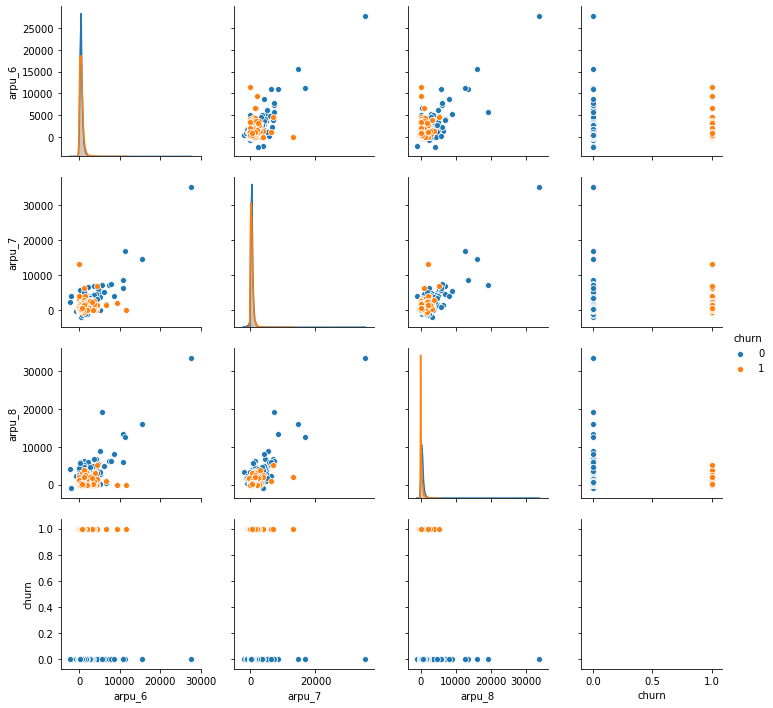

In [37]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

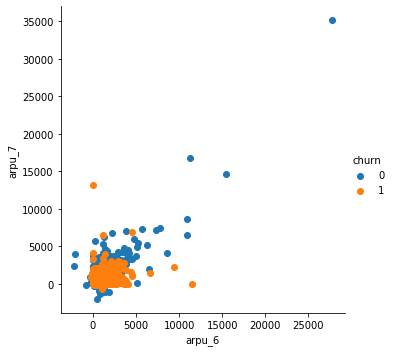

In [38]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"arpu_6","arpu_7").add_legend()

In [39]:
# arpu_6 and arpu_7 shows positive correlation with churn.

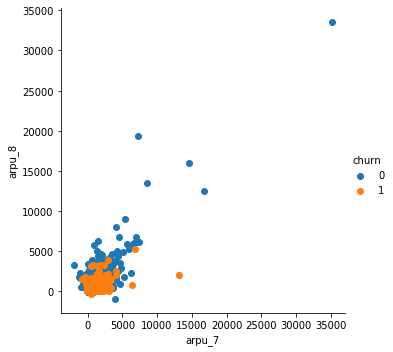

In [40]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"arpu_7","arpu_8").add_legend()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

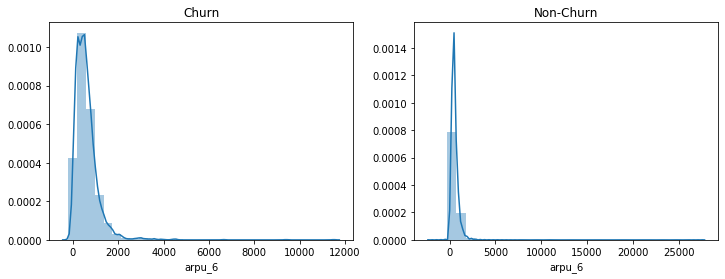

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].arpu_6, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].arpu_6, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

In [42]:
#this looks both churn and non-churn are normally distributed.

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

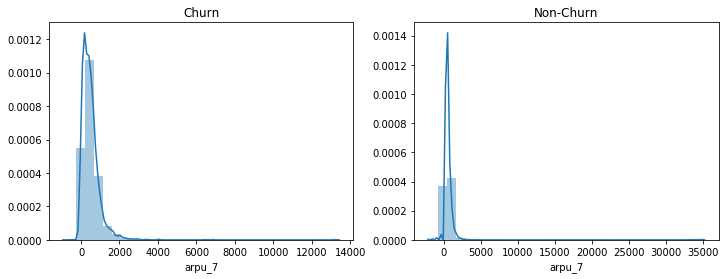

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].arpu_7, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].arpu_7, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

In [44]:
#arpu_7 with churn and non-churn are normally distributed.

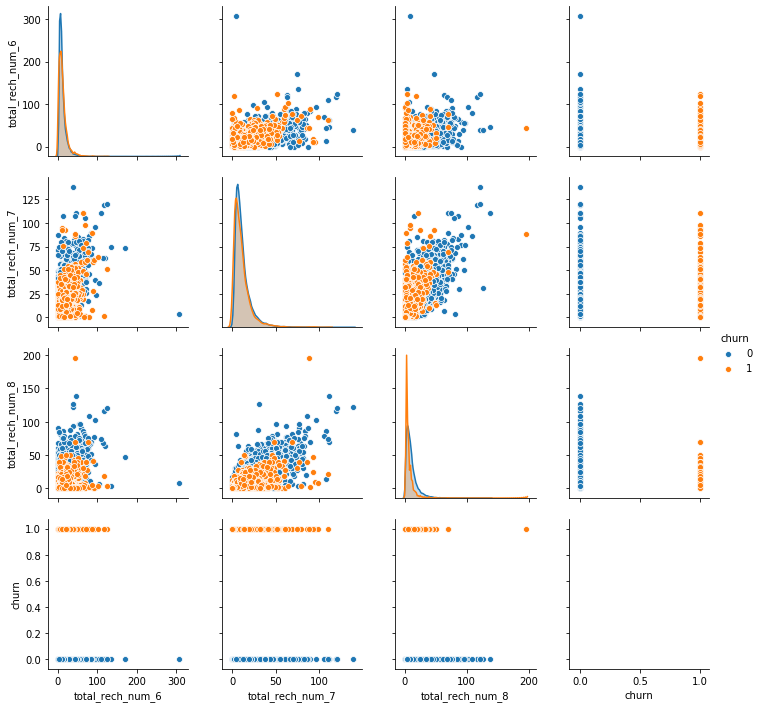

In [45]:
sns.pairplot(data=df[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn')

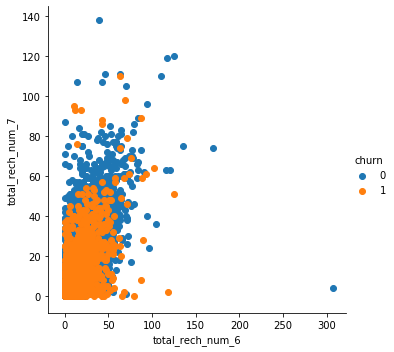

In [46]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

In [47]:
#total_reach_num6 and total_reach_num7 shows positive correlation

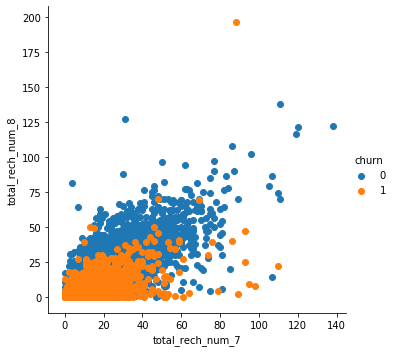

In [48]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

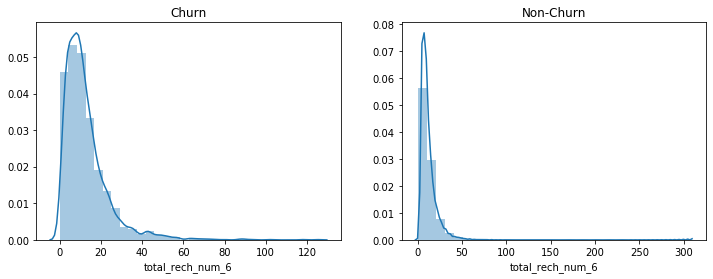

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_rech_num_6, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_rech_num_6, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

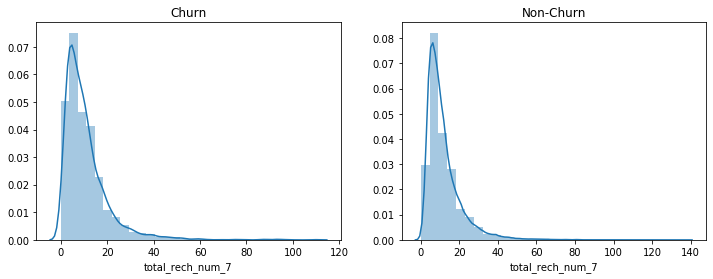

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_rech_num_7, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_rech_num_7, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')

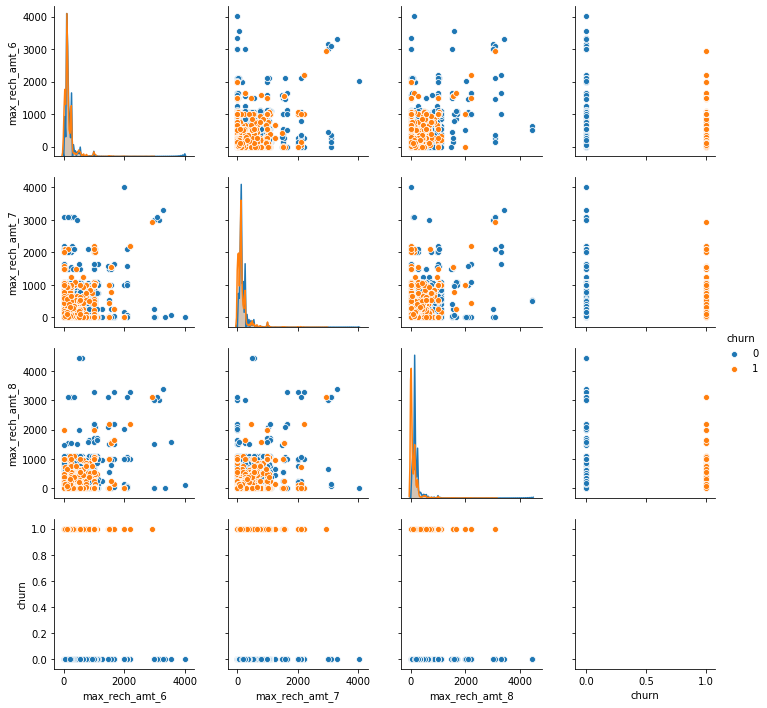

In [51]:
sns.pairplot(data=df[['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','churn']],hue='churn')

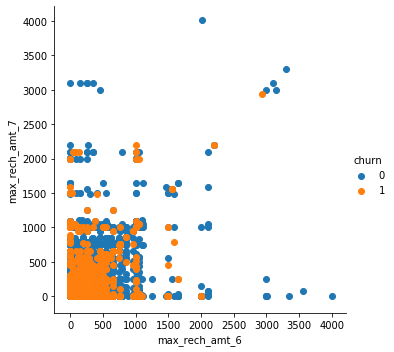

In [52]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

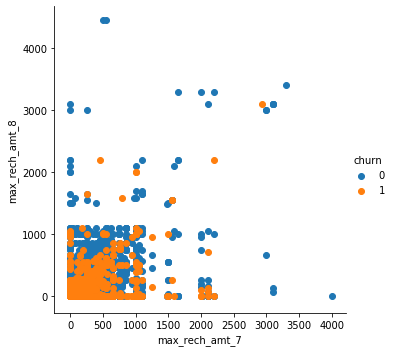

In [53]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

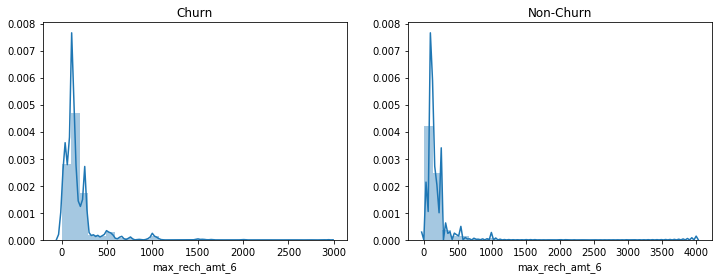

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].max_rech_amt_6, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].max_rech_amt_6, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

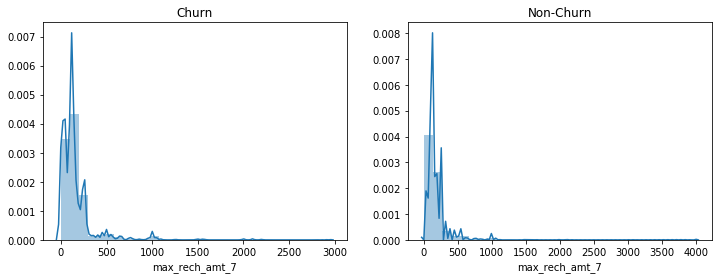

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].max_rech_amt_7, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].max_rech_amt_7, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')

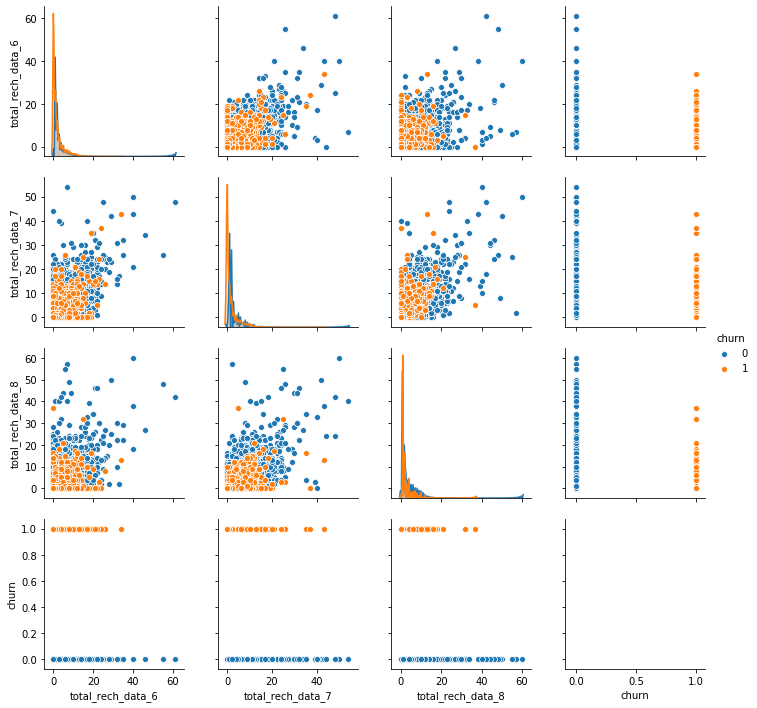

In [56]:
sns.pairplot(data=df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

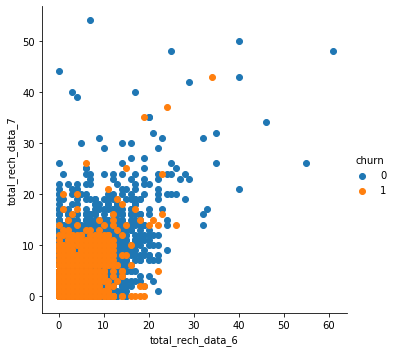

In [57]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_data_6","total_rech_data_7").add_legend()

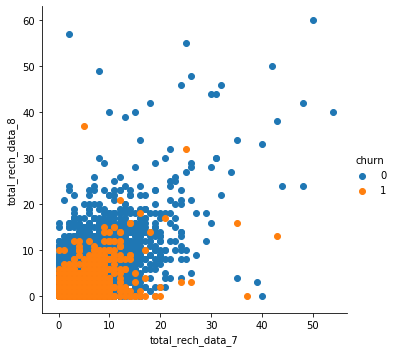

In [58]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_data_7","total_rech_data_8").add_legend()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

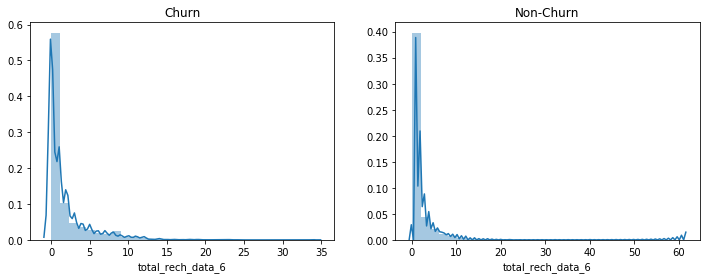

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_rech_data_6, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_rech_data_6, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

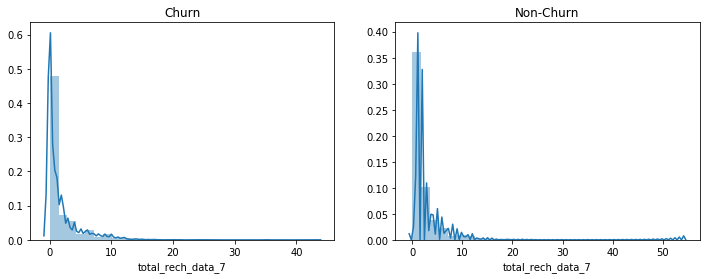

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_rech_data_7, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_rech_data_7, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

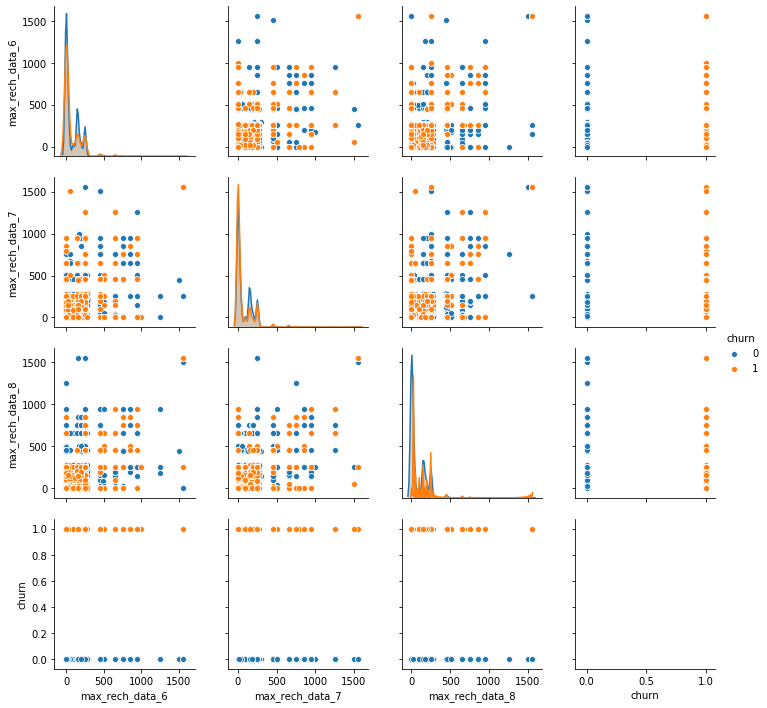

In [61]:
sns.pairplot(data=df[['max_rech_data_6','max_rech_data_7','max_rech_data_8','churn']],hue='churn')

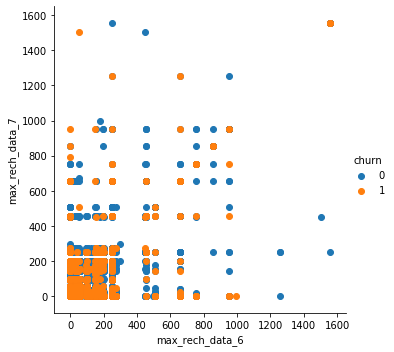

In [62]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"max_rech_data_6","max_rech_data_7").add_legend()

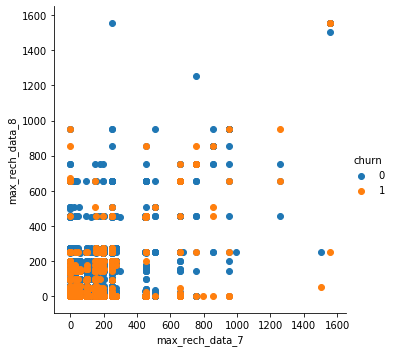

In [63]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"max_rech_data_7","max_rech_data_8").add_legend()

In [64]:
#max_reach_data7 and max_reach_data8 doesn't show much correlaton.

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

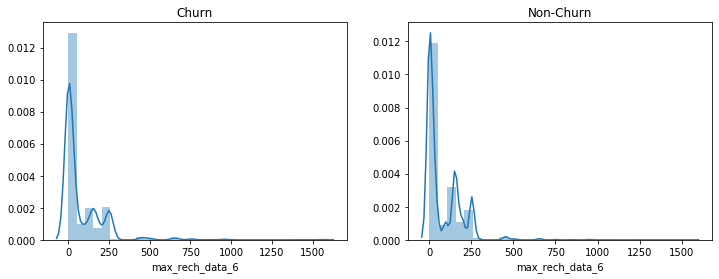

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].max_rech_data_6, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].max_rech_data_6, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

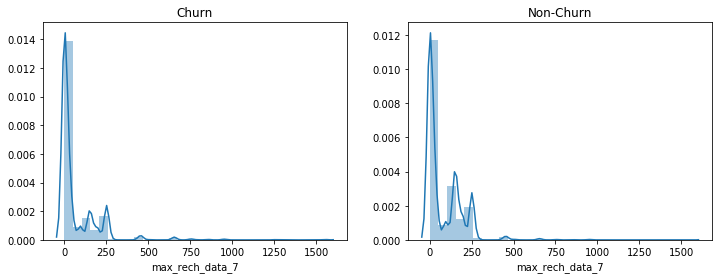

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].max_rech_data_7, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].max_rech_data_7, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

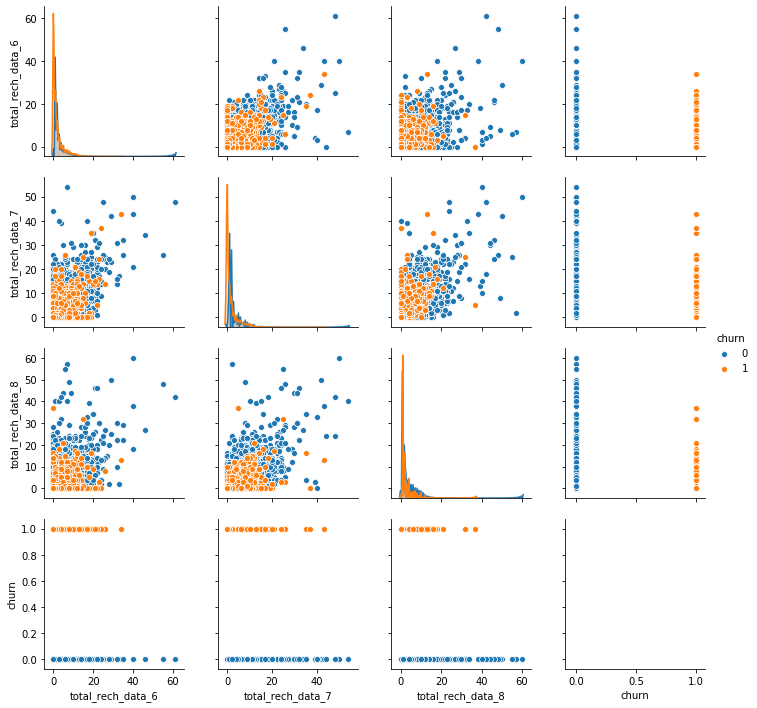

In [67]:
sns.pairplot(data=df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

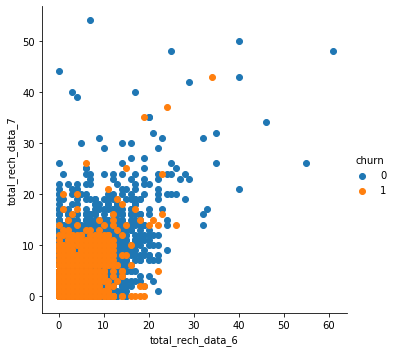

In [68]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_data_6","total_rech_data_7").add_legend()

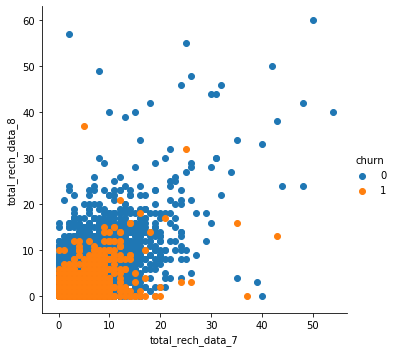

In [69]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_data_7","total_rech_data_8").add_legend()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

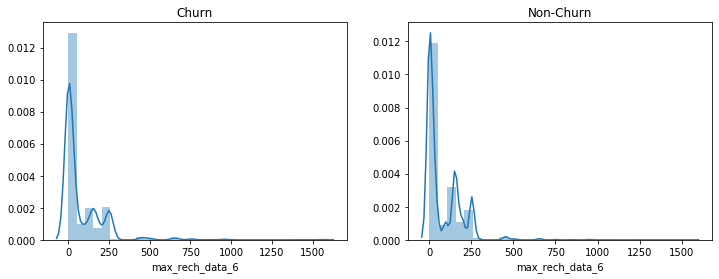

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].max_rech_data_6, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].max_rech_data_6, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

Text(0.5, 1.0, 'Churn')

Text(0.5, 1.0, 'Non-Churn')

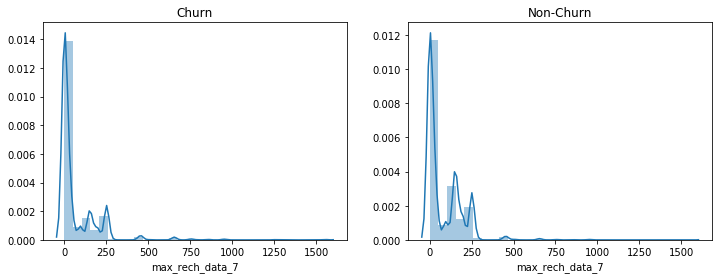

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].max_rech_data_7, bins = 30, ax = axes[0])
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].max_rech_data_7, bins = 30, ax = axes[1])
ax.set_title('Non-Churn')
plt.show()

In [72]:
#max_reach_data7 with churn and non-churn are normally distributed.

In [73]:
#taking aon column
df['aon'].head()

0     968
7     802
8     315
21    720
23    604
Name: aon, dtype: int64

In [74]:
#binning aon(age on network): no. of days customers using operator
def AON(days):
    if days > 0 and days <= 365:
        return "0-1 year"

    elif days > 365 and days <= 1095:
        return "1-3 years"

    elif days > 1095 and days <= 1825:
        return "3-5 years"

    elif days > 1825 and days <= 2555:
        return "5-7 years"

    elif days > 2555 and days <= 3650:
        return "7-10 years"

    elif days > 3650:
        return "10+ years"
df['aon_cat'] = df['aon'].apply(lambda x: AON(x))

In [75]:
df['aon_cat'].value_counts()

1-3 years     12602
0-1 year       5275
3-5 years      4888
7-10 years     3589
5-7 years      3074
10+ years       525
Name: aon_cat, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 108 entries, mobile_number to aon_cat
dtypes: float64(92), int64(15), object(1)
memory usage: 26.2+ MB


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

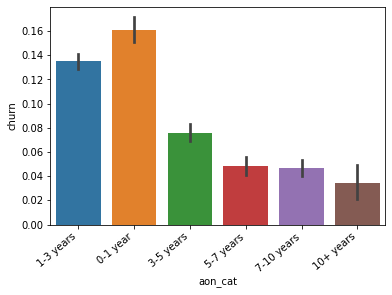

In [77]:
# total churn count with aon
sns.barplot(x='aon_cat',y='churn',data=df)
plt.xticks(rotation=40,ha='right')
plt.show()

In [78]:
#'age on number' having more churn(0 and 1) in 0-1yrs and followed by 1-3yrs and so on.

In [79]:
#taking churn as 1
default = df[df['churn'] == 1]

[Text(0, 0.5, 'churn Count'), Text(0.5, 0, 'Aon')]

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

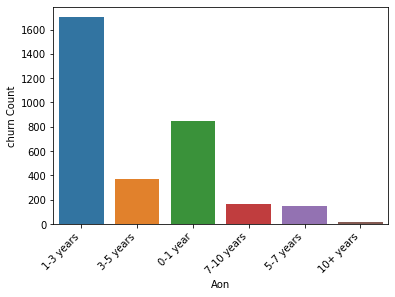

In [80]:
#ploting churn==1 with aon
ax = sns.countplot(x='aon_cat', data=default)
ax.set(xlabel='Aon', ylabel='churn Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [81]:
#As we can see that no. of churna  are higher in between 1-3 years and 0-1 years and so on.

In [82]:
#From the above plots following features are showing positive correlations with each others.

# SECTION C: Model Building

### Step 1
- Perform PCA analysis for feature selection.

### Step 2
- Build a GLM model
- Check if hyper-parameter tuning is needed if yes then perform a grid search
- with correct hyper-parameters build an other model
- Do a K-fold cross validation
- Evaluate model performance by AUC
- Check confusion Matrix

### Step 3
- Build a Random Forest model
- Check if hyper-parameter tuning is needed if yes then perform a grid search
- with correct hyper-parameters build an other model
- Do a K-fold cross validation
- Evaluate model performance by AUC
- Check confusion Matrix

### Step 4
- Build a Xgboost Forest
- Check if hyper-parameter tuning is needed if yes then perform a grid search
- Plot a Graph for hyper-parameter selection
- with correct hyper-parameters build an other model
- Evaluate model performance by AUC
- Check confusion Matrix
- If accuracy is low then perform XGBoost on random forest trees.

### Step 5
- Compare all three models and suggest best Model

In [83]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [84]:
#drop the aon_cat that is of no use.
df=df.drop('aon_cat',axis=1)

In [85]:
# dividing X and Y for dataset
X = df.drop(["mobile_number","churn"], axis=1)
Y = df["churn"]

#### Feature Scaling

In [86]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = X.columns

X_std = pd.DataFrame(scaler.fit_transform(X))
X_std.columns = cols


In [87]:
X_std.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,-0.78,-0.72,-0.59,-0.57,-0.56,-0.77,-0.76,-0.70,-0.21,-0.17,-0.17,-0.23,-0.21,-0.19,-0.37,-0.36,-0.65,-0.67,-0.29,-0.30,-0.25,-0.21,-0.24,-0.15,-0.14,-0.15,-0.57,-0.57,-0.50,-0.05,-0.33,-0.33,-0.32,-0.16,-0.02,-0.02,-0.40,-0.69,-0.69,-0.33,-0.33,-0.31,-0.19,-0.19,-0.19,-0.30,-0.29,-0.27,-0.14,-0.14,-0.13,-0.32,-0.11,-0.24,-0.14,-0.15,-0.16,-0.08,-0.09,-0.10,-0.83,-0.92,-0.86,0.47,0.44,0.53,1.05,1.08,1.10,-0.24,-0.28,-0.21,1.54,1.51,1.62,0.49,0.42,0.46,0.60,0.54,0.66,-0.29,-0.37,-0.32,-0.29,-0.24,-0.26,-0.12,-0.11,-0.11,-0.40,-0.41,-0.38,0.96,0.95,1.05,-0.25,-0.33,-0.40,-0.14,-0.14,-0.19,1.17,2.46,3.58
1,1.11,1.64,5.30,-0.44,-0.44,0.16,0.38,-0.02,0.00,0.27,0.26,-0.02,-0.08,0.17,-0.14,-0.23,0.58,1.18,2.52,2.43,-0.25,-0.21,-0.24,0.40,1.41,1.38,-0.47,-0.45,-0.38,-0.05,-0.08,-0.33,-0.00,-0.16,-0.02,-0.02,-0.04,0.31,0.32,2.99,1.74,0.58,0.28,-0.04,0.23,0.63,0.91,1.10,2.59,1.61,0.99,0.79,-0.11,-0.24,-0.11,0.03,0.29,1.04,0.86,1.09,-0.73,-0.71,-0.32,8.04,3.40,8.19,-0.70,-0.71,4.73,-0.59,-0.60,-0.54,-0.69,-0.70,-0.66,-0.37,-0.36,-0.32,-0.65,-0.68,-0.62,-0.38,-0.38,-0.34,-0.38,-0.40,-0.38,-0.12,-0.11,-0.11,-0.40,-0.41,-0.38,-1.04,-1.05,-0.96,-0.43,-0.26,-0.36,-0.34,-0.32,-0.36,-0.11,0.50,0.15
2,-0.39,-0.14,-0.74,0.33,0.17,-0.58,-0.60,-0.41,-0.21,-0.17,-0.17,-0.23,-0.21,-0.19,0.93,0.55,-0.33,-0.38,-0.29,-0.30,-0.25,-0.21,0.76,-0.15,-0.14,-0.15,-0.36,-0.34,-0.34,-0.05,-0.33,-0.33,0.18,-0.16,-0.02,-0.02,-0.25,-0.42,-0.63,-0.33,-0.33,-0.33,-0.19,-0.18,-0.19,-0.07,-0.25,-0.26,-0.14,-0.14,-0.13,-0.32,-0.11,-0.24,-0.14,-0.15,-0.16,-0.08,-0.09,-0.10,0.76,0.98,0.43,-0.45,-0.10,-0.75,-0.35,-0.71,-0.57,-0.59,0.05,0.46,-0.69,0.65,-0.45,-0.37,-0.36,-0.32,-0.65,0.18,-0.27,-0.38,0.70,-0.34,-0.38,0.42,-0.37,-0.12,-0.11,-0.11,-0.40,1.81,-0.38,-1.04,0.95,1.05,-0.93,-0.35,1.65,-0.09,-0.32,-0.12,0.32,-0.81,-0.61
3,-0.10,0.08,0.26,-0.34,-0.28,0.80,1.04,1.35,-0.21,-0.17,-0.17,-0.23,-0.21,-0.19,-0.35,-0.33,-0.29,-0.31,-0.25,-0.22,-0.25,-0.21,-0.24,-0.15,-0.14,-0.15,0.68,0.89,1.04,-0.05,-0.33,-0.33,-0.32,-0.16,-0.02,-0.02,-0.38,-0.15,-0.35,-0.23,-0.27,-0.09,-0.01,-0.11,-0.19,0.39,0.07,0.71,-0.14,-0.14,-0.13,-0.32,-0.11,-0.24,-0.14,-0.15,-0.16,-0.08,-0.09,-0.10,1.08,1.51,1.84,-0.68,-0.67,-0.64,-0.49,-0.57,-0.29,-0.59,-0.60,-0.54,-0.69,-0.70,-0.66,-0.37,-0.36,-0.32,-0.65,-0.68,-0.62,-0.38,-0.38,-0.34,-0.38,-0.40,-0.38,-0.12,-0.11,-0.11,-0.40,-0.41,-0.38,-1.04,-1.05,-0.96,-0.51,-0.40,-0.40,-0.38,-0.32,-0.36,-0.76,-0.81,-0.81
4,-1.05,-0.77,-0.28,-0.

In [88]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.8,test_size=0.2,random_state=100)

In [89]:
# checking shape to split data
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(23962, 105)

(5991, 105)

(23962,)

(5991,)

In [90]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca1 = PCA(svd_solver='randomized', random_state=42)

In [91]:
#apply the PCA on the train data
pca1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

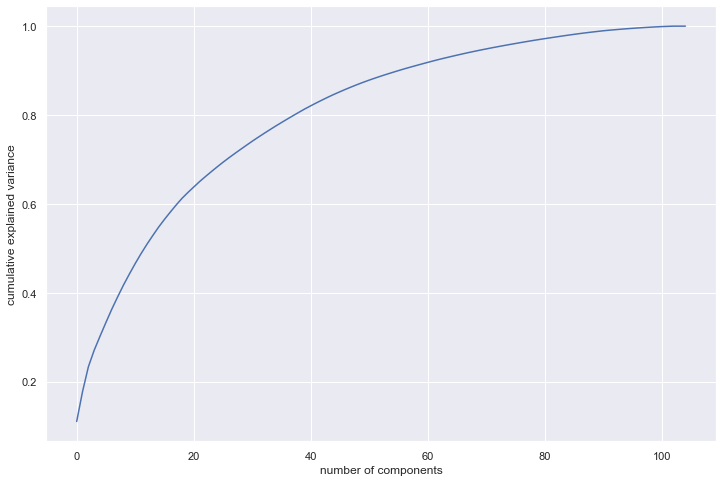

In [92]:
# plot a screeplot to check the number of suitable components
sns.set()
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [93]:
# around 38 components can express the 80% of the data.

#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca2 = IncrementalPCA(n_components=38)

In [94]:
df_train_pca = pca2.fit_transform(X_train)
df_train_pca.shape

(23962, 38)

<Figure size 1440x720 with 0 Axes>

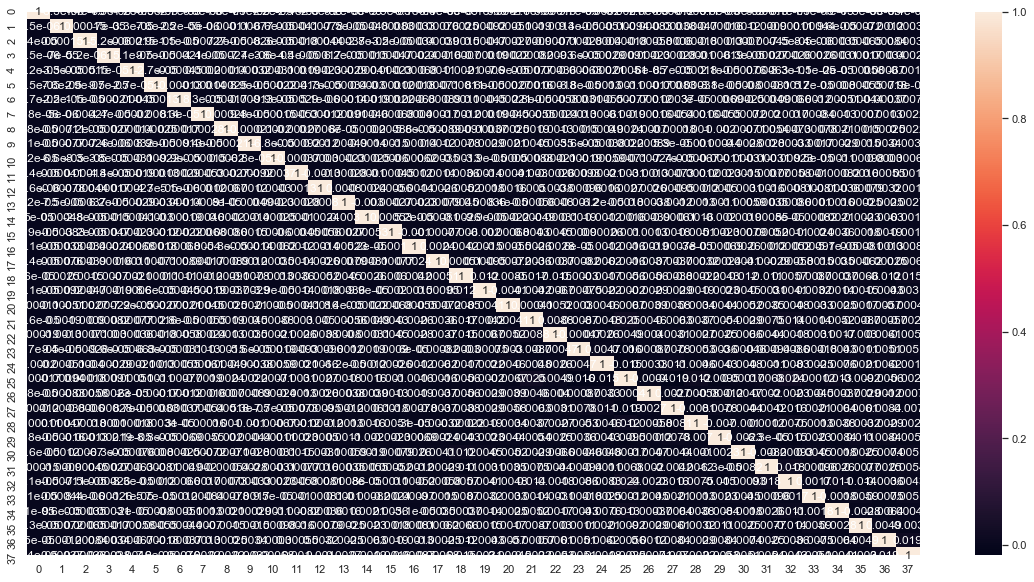

In [95]:
# Quickly checking the correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [96]:
# apply selected components to test dataset with 60 columns (originally)
df_test_pca = pca2.transform(X_test)
df_test_pca.shape

(5991, 38)

### Function define for metrics

In [97]:
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


def printConfusionMatrixAndModelPerformanceParams(y_true, y_pred):
    print('Confusion Matrix:: ', metrics.confusion_matrix( y_true, y_pred))
    # accuracy
    print("accuracy:: ", metrics.accuracy_score( y_true, y_pred))

    # precision
    print("precision:: ", metrics.precision_score( y_true, y_pred))

    # recall/sensitivity
    print("recall:: ", metrics.recall_score( y_true, y_pred))



def print_classification_repo(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
    print(classification_report(y_test, y_pred))
    
def draw_roc_curve(y_test, y_pred, plot_dim = [10,10] ):
    import matplotlib as plotter
    import seaborn as seaplt
    seaplt.set()
    plotter.rcParams['figure.figsize'] = plot_dim
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    

### Logistic Regreesion

In [98]:
#train the model on the train data
from sklearn.linear_model import LogisticRegression

pca_lr1 = LogisticRegression()
pca_model =pca_lr1.fit(df_train_pca,y_train)

Accuracy for the test dataset 90.5%
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5363
           1       0.62      0.24      0.34       628

    accuracy                           0.90      5991
   macro avg       0.77      0.61      0.65      5991
weighted avg       0.89      0.90      0.89      5991

ROC for the test dataset 61.0%


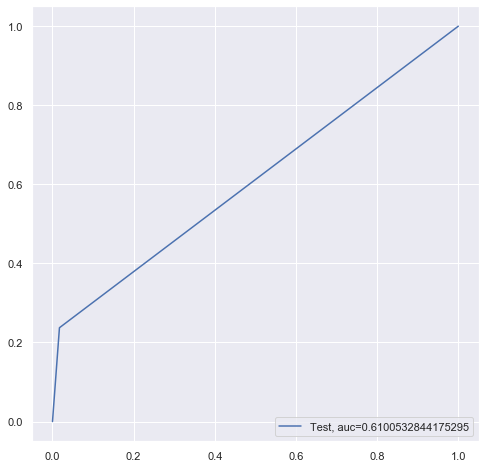

In [99]:
# Making prediction on the test data

predictions = pca_model.predict(df_test_pca) 
print_classification_repo(y_test, predictions)

draw_roc_curve(y_test, predictions, [8,8])


In [100]:
#Making prediction on the test data
pred_probs_test = pca_model.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [101]:
# Grid Search for finding right hyper params 

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(df_train_pca,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.90134379434104


In [102]:
logreg2 = LogisticRegression(C=1,penalty="l2")
logreg2.fit(df_train_pca,y_train)


finalPreds = logreg2.predict(df_test_pca)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy for the test dataset 90.5%
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5363
           1       0.62      0.24      0.34       628

    accuracy                           0.90      5991
   macro avg       0.77      0.61      0.65      5991
weighted avg       0.89      0.90      0.89      5991

ROC for the test dataset 61.0%


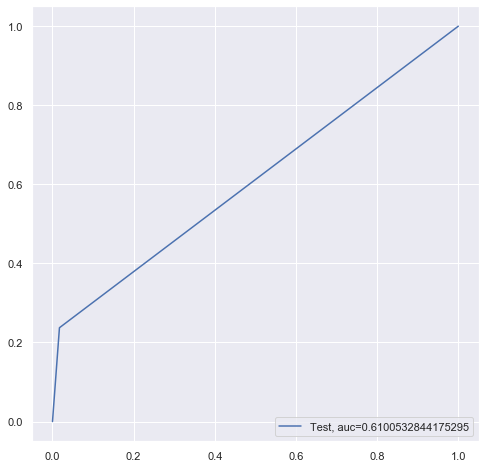

In [103]:
#plotting Roc curve 
print_classification_repo(y_test, finalPreds)

draw_roc_curve(y_test, finalPreds, [8,8])


In [104]:
finalPreds_logreg = finalPreds

## Random forest Model

- base line model with PCA Data
- build another model with original dataset(without PCA)
- Grid search
- KFold validation

In [105]:
# let's build a baseline model
from sklearn.ensemble import RandomForestClassifier
RFC_base = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False)

In [106]:
RFC= RFC_base.fit(df_train_pca,y_train)

Accuracy for the test dataset 89.5%
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      5363
           1       0.00      0.00      0.00       628

    accuracy                           0.90      5991
   macro avg       0.45      0.50      0.47      5991
weighted avg       0.80      0.90      0.85      5991

ROC for the test dataset 50.0%


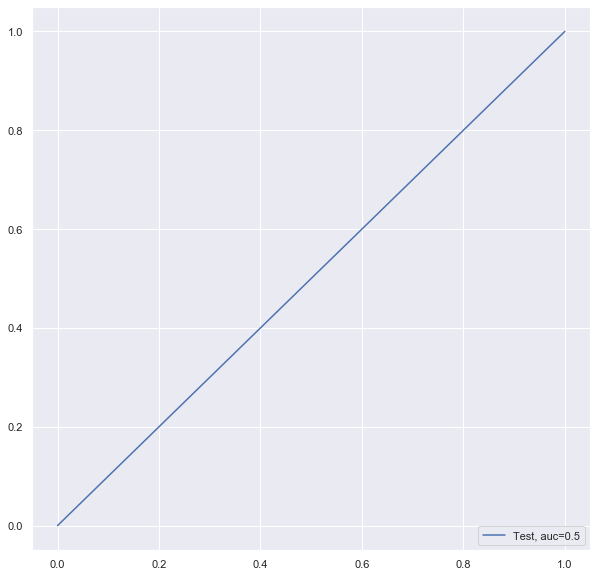

In [107]:
#prediction on testdata and plotting roc curve
preds_RFC=RFC.predict(df_test_pca)

print_classification_repo(y_test, preds_RFC)

draw_roc_curve(y_test, preds_RFC, plot_dim = [10,10] )

#### Random Forest on original dataset

In [108]:
# Random Forest on original dataset

RFC_balanced_2 = RandomForestClassifier(n_estimators=105, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

RFC2= RFC_balanced_2.fit(X_train, y_train)


In [109]:
RFC_balanced_2

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=500, min_weight_fraction_leaf=0.0,
                       n_estimators=105, n_jobs=-1, oob_score=False,
                       random_state=9999, verbose=0, warm_start=False)

Accuracy for the test dataset 87.1%
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      5363
           1       0.44      0.81      0.57       628

    accuracy                           0.87      5991
   macro avg       0.71      0.85      0.75      5991
weighted avg       0.92      0.87      0.89      5991

ROC for the test dataset 84.6%


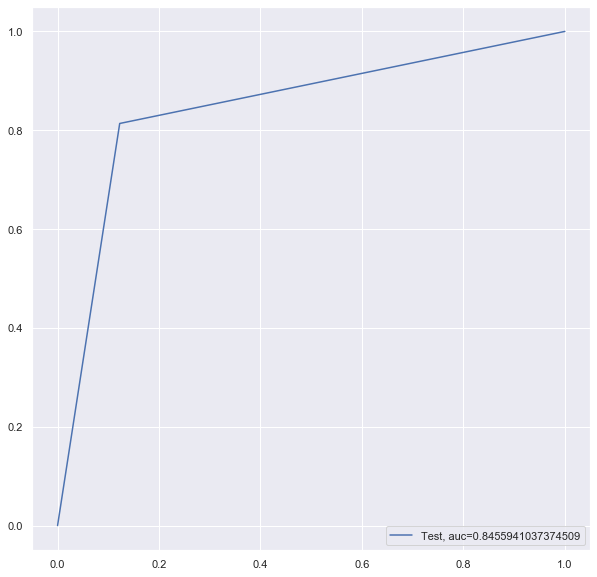

In [110]:
#prediction on test data and plotting roc curve
preds_RFC2 =RFC2.predict(X_test)

print_classification_repo(y_test, preds_RFC2)

draw_roc_curve(y_test, preds_RFC2, plot_dim = [10,10] )

In [111]:
# grid search for random forest to tune hyper parameters.

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [15,20,25],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2,3,4]
}

rfcGS = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=105)


In [112]:
CV_rfc = GridSearchCV(estimator=rfcGS, param_grid=param_grid, cv= 5,  verbose=3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=105, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             ii

In [113]:
# checking search results

In [114]:
print('\n Best estimator:')
print(CV_rfc.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, param_grid))
# print(CV_rfc.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(CV_rfc.best_params_)


 Best estimator:
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=105, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

 Best hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 3}


In [115]:
# now building the final Forest with newly discovered params.

final_forest_model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


In [116]:
fit_model= final_forest_model.fit(X_train, y_train)

Accuracy for the test dataset 92.2%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5363
           1       0.65      0.56      0.60       628

    accuracy                           0.92      5991
   macro avg       0.80      0.76      0.78      5991
weighted avg       0.92      0.92      0.92      5991

ROC for the test dataset 76.0%


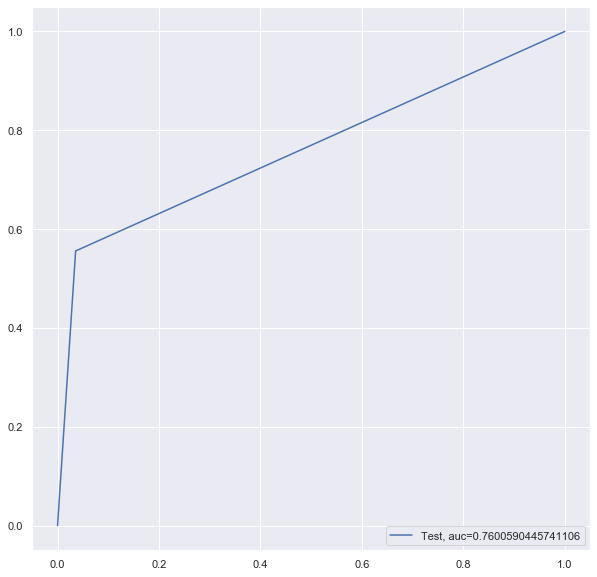

In [117]:
#prediction on test dataset
final_predictions =fit_model.predict(X_test)
#check for accuracy
print_classification_repo(y_test, final_predictions)
#plotting roc curve
draw_roc_curve(y_test, final_predictions, plot_dim = [10,10] )

In [118]:
# finding the influencing features:
feature_importances = pd.DataFrame(final_forest_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
max_rech_amt_8,0.09
loc_ic_t2f_mou_8,0.07
last_day_rch_amt_8,0.06
arpu_8,0.05
loc_og_t2f_mou_8,0.05
offnet_mou_8,0.04
rech_days_left_8,0.03
std_og_mou_8,0.03
roam_og_mou_8,0.03
std_ic_t2t_mou_8,0.03


In [119]:
final_predictions_rf = final_predictions;

### XGBOOST

In [120]:
# Now building a XGBoost model

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error
# X_train, X_test, y_train, y_test


In [121]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 105)

xg_reg.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=105, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [122]:
#predictions on test dataset
predictions = xg_reg.predict(X_test)
predictions = [round(value) for value in predictions]

In [123]:
#checking root mean square value
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.269460


Accuracy for the test dataset 92.7%
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5363
           1       0.74      0.48      0.58       628

    accuracy                           0.93      5991
   macro avg       0.84      0.73      0.77      5991
weighted avg       0.92      0.93      0.92      5991

ROC for the test dataset 72.9%


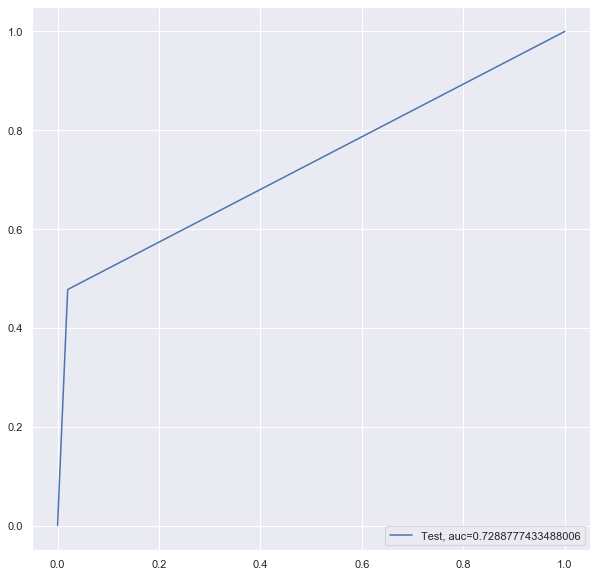

In [124]:
#check for accuracy
print_classification_repo(y_test, predictions)
#plotting roc curve
draw_roc_curve(y_test, predictions, plot_dim = [10,10] )

In [125]:
kfold = StratifiedKFold(n_splits=5, random_state=7)
results = cross_val_score(xg_reg, X, Y, cv=kfold)


In [126]:
results

array([0.92405275, 0.92605575, 0.92204974, 0.92320534, 0.92821369])

In [127]:
#checking accuracy
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 92.47% (0.22%)


## XGBoost with imbalance treatment

In [128]:
 from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)

xcols = X.columns
X_imb_df, y_imb_df = sm.fit_sample(X, Y.ravel())

X_imb_df = pd.DataFrame(X_imb_df)
X_imb_df.columns = xcols

In [129]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb_df, y_imb_df, test_size=0.3, random_state=40)

y_train_imb = y_train_imb.reshape(-1, 1)
y_test_imb = y_test_imb.reshape(-1, 1)

y_train_imb.shape
y_test_imb.shape

(37377, 1)

(16019, 1)

In [130]:
X_imb_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.00,2.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,1.00,1.00,252.00,252.00,252.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,968.00,30.40,0.00,101.20,252.00,252.00,9.00,15.00,23.00
1,1069.18,1349.85,3171.48,57.84,54.68,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,308.63,447.38,62.13,53.23,0.00,0.00,0.00,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.00,0.00,58.14,217.56,221.49,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,1580.00,790.00,1580.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,0.00,3.00,6.00,5.00
2,378.72,492.22,137.36,413.69,351.03,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,80.96,70.58,0.00,0.00,0.00,0.00,7.15,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.00,0.00,23.84,57.58,13.98,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,0.00,0.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,315.00,21.03,910.65,122.16,0.00,354.00,5.00,0.00,1.00
3,514.45,597.75,637.76,102.41,132.11,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,91.81,87.93,0.75,1.58,0.00,0.00,0.00,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.48,118.23,74.63,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00,26.00,27.00,50.00,50.00,50.00,30.00,20.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,720.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,74.35,193.90,366.97,48.96,50.66,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,82.94,83.01,0.00,0.00,0.0

In [131]:
data_dmatrix_imb = xgb.DMatrix(data=X_imb_df,label=y_imb_df)

xg_imb = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 105)

xg_imb.fit(X_train_imb,y_train_imb)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=105, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [133]:
#predictions on test data
predictions = xg_imb.predict(X_test_imb)
predictions = [round(value) for value in predictions]

In [134]:
#checking for root mean square.

In [135]:
rmse = np.sqrt(mean_squared_error(y_test_imb, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.191100


Accuracy for the test dataset 96.3%
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7980
           1       0.97      0.96      0.96      8039

    accuracy                           0.96     16019
   macro avg       0.96      0.96      0.96     16019
weighted avg       0.96      0.96      0.96     16019

ROC for the test dataset 96.4%


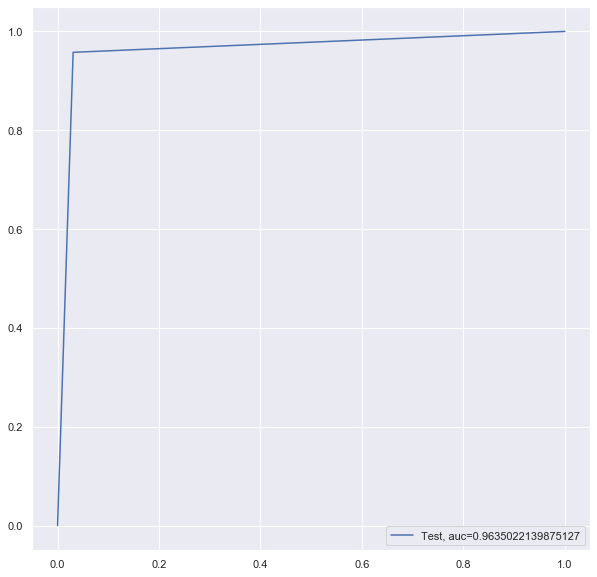

In [136]:
#check for accuracy
print_classification_repo(y_test_imb, predictions)
#plotting roc curve
draw_roc_curve(y_test_imb, predictions, plot_dim = [10,10] )


In [137]:
# we want to tune the hyper params now to get better 

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {
        'min_child_weight': [1, 5, 10, 15],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': range(1, 21, 2)
        }


In [138]:
xgbGS = XGBClassifier(learning_rate=0.02, n_estimators=105, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgbGS, param_distributions=params, n_iter=param_comb, 
                                   scoring='roc_auc', n_jobs=4, cv=skf.split(X_imb_df, y_imb_df), verbose=3, 
                                   random_state=1001 )


In [139]:
random_search.fit(X_imb_df, y_imb_df)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  4.9min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x1a52ae07d0>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=105,
                                           n_jobs=1, nthread=1,
                                           objective=...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='warn',

In [140]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=11,
              min_child_weight=5, missing=None, n_estimators=105, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

 Best normalized gini score for 3-fold search with 5 parameter combinations:
0.9695445089958548

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 11, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [141]:
# now making a Final model with best derived hyperparamter
xgbHyp = XGBClassifier(learning_rate=0.02, n_estimators=105, objective='binary:logistic',
                    silent=True, nthread=1, subsample= 1.0, min_child_weight= 1, 
                       max_depth= 19, gamma= 1.5, colsample_bytree= 1.0)

xgbHyp.fit(X_train_imb, y_train_imb)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=19,
              min_child_weight=1, missing=None, n_estimators=105, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

In [142]:
#predictions on test data
predictions = xgbHyp.predict(X_test_imb)
predictions = [round(value) for value in predictions]


Accuracy for the test dataset 94.2%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7980
           1       0.93      0.95      0.94      8039

    accuracy                           0.94     16019
   macro avg       0.94      0.94      0.94     16019
weighted avg       0.94      0.94      0.94     16019

ROC for the test dataset 94.2%


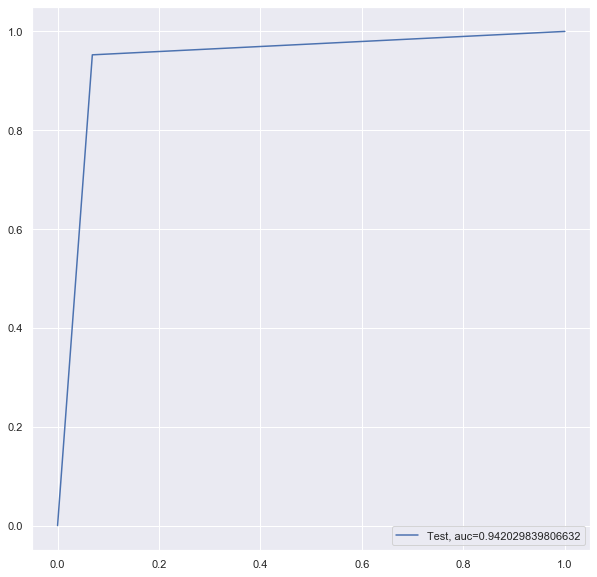

In [143]:
#check for accuracy
print_classification_repo(y_test_imb, predictions)
#plotting roc curve
draw_roc_curve(y_test_imb, predictions, plot_dim = [10,10] )

In [144]:
# now getting the influencing features:

importance = xgbHyp.feature_importances_
col_names =  X.columns

feature_importance = pd.DataFrame(sorted(zip(importance, list(col_names)), reverse=True))
feature_importance.columns=['value', 'featureName']
feature_importance.head(5)


,value,featureName
0,0.19,arpu_8
1,0.13,roam_og_mou_8
2,0.11,fb_user_8
3,0.03,offnet_mou_8
4,0.02,max_rech_amt_8


In [145]:
# checking the important features based on gains

gain = xgbHyp.get_booster().get_score(importance_type="gain")

gain_imp = pd.DataFrame.from_dict(gain, orient='index').reset_index()

gain_imp.columns=['featureName', 'value']

gain_imp['value'] = round(gain_imp['value'], 1)

gain_imp.sort_values("value", axis = 0, ascending = False, 
                 inplace = True)


In [146]:
gain_imp.head(20)

,featureName,value
0,arpu_8,208.40
65,roam_og_mou_8,147.50
1,fb_user_8,116.80
12,offnet_mou_8,33.40
2,max_rech_amt_8,26.20
22,rech_days_left_8,23.60
3,last_day_rch_amt_8,22.30
50,aug_vbc_3g,21.20
70,total_rech_data_8,14.00
82,monthly_2g_8,13.10


In [147]:
# definfing the important feature cutoff as gain value = 10.

imp_features = gain_imp[gain_imp['value'] > 10]
imp_features

,featureName,value
0,arpu_8,208.40
65,roam_og_mou_8,147.50
1,fb_user_8,116.80
12,offnet_mou_8,33.40
2,max_rech_amt_8,26.20
22,rech_days_left_8,23.60
3,last_day_rch_amt_8,22.30
50,aug_vbc_3g,21.20
70,total_rech_data_8,14.00
82,monthly_2g_8,13.10


In [148]:
imp_features['featureName'].values

array(['arpu_8', 'roam_og_mou_8', 'fb_user_8', 'offnet_mou_8',
       'max_rech_amt_8', 'rech_days_left_8', 'last_day_rch_amt_8',
       'aug_vbc_3g', 'total_rech_data_8', 'monthly_2g_8',
       'count_rech_3g_8', 'loc_ic_t2f_mou_8'], dtype=object)

In [149]:
# now lets build another model with these features only and measure the model performance.

reduced_tain_df = X_train_imb[imp_features['featureName'].values]

reduced_tain_df.head()

,arpu_8,roam_og_mou_8,fb_user_8,offnet_mou_8,max_rech_amt_8,rech_days_left_8,last_day_rch_amt_8,aug_vbc_3g,total_rech_data_8,monthly_2g_8,count_rech_3g_8,loc_ic_t2f_mou_8
14550,628.62,0.00,1.00,142.69,252.00,13.00,0.00,530.83,2.00,0.00,1.00,19.68
10909,94.88,0.00,1.00,22.51,41.00,2.00,25.00,0.00,5.00,0.00,1.00,0.00
25086,159.49,0.00,1.00,25.63,30.00,1.00,23.00,0.00,7.00,0.00,0.00,20.46
28067,793.69,0.00,1.00,461.29,150.00,1.00,50.00,2039.00,7.00,0.00,3.00,0.28
52535,57.21,0.00,1.00,18.42,26.29,7.00,0.00,0.00,3.26,0.00,0.74,0.00


In [150]:
reduced_test_df = X_test_imb[imp_features['featureName'].values]
reduced_test_df.head()

,arpu_8,roam_og_mou_8,fb_user_8,offnet_mou_8,max_rech_amt_8,rech_days_left_8,last_day_rch_amt_8,aug_vbc_3g,total_rech_data_8,monthly_2g_8,count_rech_3g_8,loc_ic_t2f_mou_8
14328,607.65,0.00,1.00,381.44,154.00,3.00,154.00,172.44,3.00,1.00,0.00,11.21
33239,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00
1626,625.27,0.00,1.00,174.18,179.00,0.00,130.00,44.11,1.00,0.00,1.00,10.38
2280,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15204,29.80,0.00,1.00,9.88,0.00,5.00,0.00,0.00,1.00,0.00,1.00,53.34


In [151]:
xgbReduced = XGBClassifier(learning_rate=0.02, n_estimators=105, objective='binary:logistic',
                    silent=True, nthread=1, subsample= 1.0, min_child_weight= 1, 
                       max_depth= 19, gamma= 1.5, colsample_bytree= 1.0)

xgbReduced.fit(reduced_tain_df, y_train_imb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=19,
              min_child_weight=1, missing=None, n_estimators=105, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

In [152]:
#predictions on test data
Rpredictions = xgbReduced.predict(reduced_test_df)
Rpredictions = [round(value) for value in Rpredictions]


In [153]:
rmse = np.sqrt(mean_squared_error(y_test_imb, Rpredictions))
print("RMSE: %f" % (rmse))

RMSE: 0.264772


In [154]:
print_classification_repo(y_test_imb, Rpredictions)

Accuracy for the test dataset 93.0%
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7980
           1       0.93      0.93      0.93      8039

    accuracy                           0.93     16019
   macro avg       0.93      0.93      0.93     16019
weighted avg       0.93      0.93      0.93     16019



ROC for the test dataset 93.0%


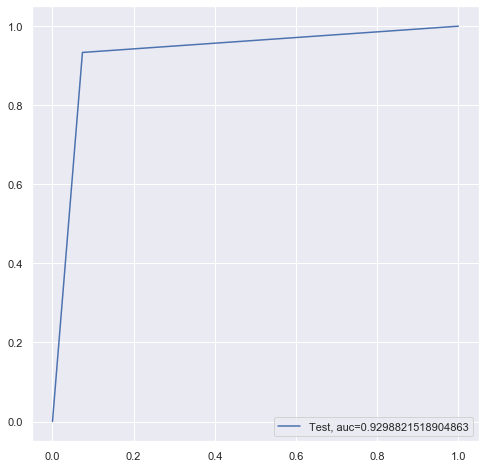

In [155]:
draw_roc_curve(y_test_imb, Rpredictions, plot_dim = [8,8])

- With only 9 Features we can now get a Good predictions with 92% AUC score and 0.92 F1 score as well

In [156]:
print("========================================")
timer(start_time)
print("========================================")



 Time taken: 0 hours 30 minutes and 9.94 seconds.


# SECTION D: Conclusion

- Comparing models
- Final Influencing attributes.

#### Model Comparison

In [157]:
#define function for roc_curve.
def getXYForComparison(y_test, y_pred):
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    return  fpr, tpr, roc_auc


Text(0.5, 1.0, 'AUC Logistic regression')

Text(0.5, 1.0, 'AUC Random Forest')

Text(0.5, 1.0, 'AUC XGBoost')

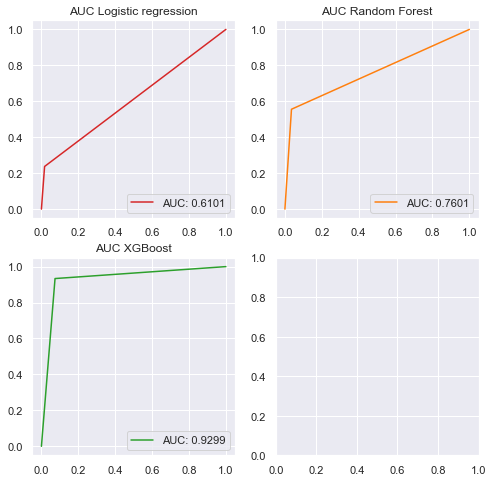

In [158]:
fig, axs = plt.subplots(2, 2)

# adding new subplot for Logistic regression

log_x, log_y, roc_auc_log = getXYForComparison(y_test, finalPreds_logreg)

axs[0, 0].plot(log_x, log_y, Label="AUC: " + str(round(roc_auc_log, 4)), color = 'tab:red' )
axs[0, 0].legend(loc=4)
axs[0, 0].set_title('AUC Logistic regression')


# adding subplot for Random Forest

rf_x, rf_y, roc_auc_rf = getXYForComparison(y_test, final_predictions_rf)

axs[0, 1].plot(rf_x, rf_y, Label="AUC: " + str(round(roc_auc_rf, 4)),color = 'tab:orange' )
axs[0, 1].legend(loc=4)
axs[0, 1].set_title('AUC Random Forest')

# adding subplots for XGBoost

xgb_x, xgb_y, roc_auc_xbg = getXYForComparison(y_test_imb, Rpredictions)

axs[1, 0].plot(xgb_x, xgb_y, Label="AUC: " + str(round(roc_auc_xbg, 4)),color = 'tab:green' )
axs[1, 0].legend(loc=4)
axs[1, 0].set_title('AUC XGBoost')

plt.show()

### Its clear from the above graphs that XGBoost is performing best among all the three models

### Finally the following attribtues are most influential for a customer to churn

*Attributes to watch out*

- arpu_8
- roam_og_mou_8
- fb_user_8
- offnet_mou_8
- max_rech_amt_8
- rech_days_left_8
- last_day_rch_amt_8
- aug_vbc_3g
- total_rech_data_8
- monthly_2g_8
- count_rech_3g_8
- loc_ic_t2f_mou_8

